In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import yfinance as yf

In [ ]:
# Define the ticker symbol for Apple
ticker = 'AAPL'

# Get the data of the stock
data = yf.download(ticker, start="2020-01-01", )
print(data.shape)

[*********************100%%**********************]  1 of 1 completed

(1221, 6)


In [7]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565178,132079200


### PCA weights from a risk distribution R

In [62]:
def pcaWeights(cov, riskDist=None, riskTarget=1.):
    eVal, eVec = np.linalg.eig(cov)
    indices = eVal.argsort()[::-1]
    eVal, eVec = eVal[indices], eVec[:, indices]
    if riskDist is None:
        riskDist = np.zeros(cov.shape[0])
        riskDist[-1] = 1
    loads = riskTarget * (riskDist/eVal)**.5
    wghts = np.dot(eVec, loads.reshape(-1, 1))
    return wghts

In [80]:
matrixSize = 3 
np.random.seed(0)
A = np.random.rand(matrixSize, matrixSize)
B = np.dot(A, A.transpose())
pcaWeights(B)

array([[ 4.91041938],
       [-3.132718  ],
       [-1.73855105]])

#### The symmetric CUSUM Filter

In [81]:
def getTEvents(gRaw, h):
    tEvents, sPos, sNeg = [], 0, 0
    diff = gRaw.diff()
    for i in diff.index[1:]:
        sPos, sNeg = max(0, sPos + diff.loc[i]), min(0, sNeg + diff.loc[i])
        if sPos > h:
            sPos = 0
            tEvents.append(i)
        if sNeg < -h:
            sNeg = 0
            tEvents.append(i)
    return tEvents

In [102]:
prices = pd.Series(data['Close'])
events = getTEvents(prices, 5)

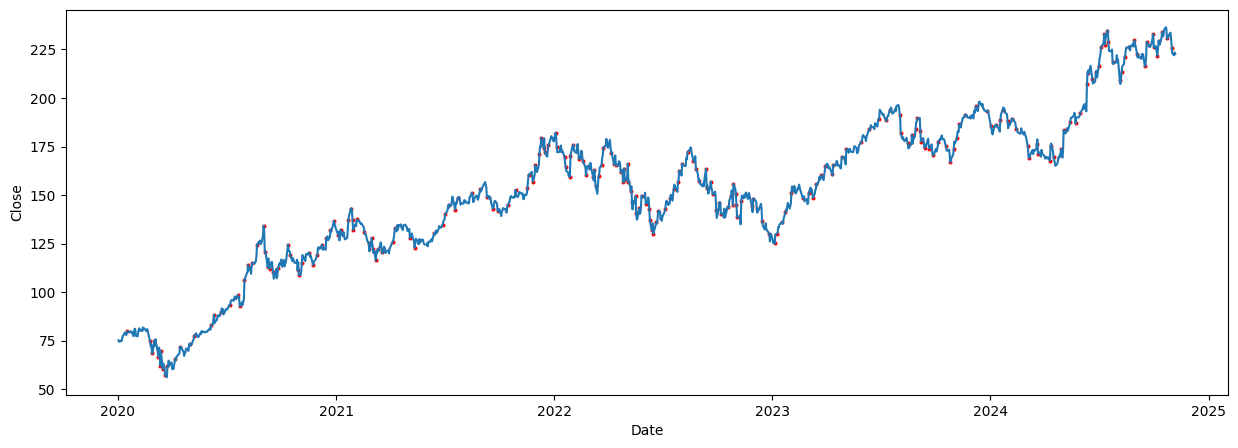

In [103]:
plt.figure(figsize=(15,5))
sns.lineplot(data['Close'])
sns.scatterplot(x=events,y=data.loc[events,'Close'], s=10, color="red")
plt.show()

## Exercise

In [112]:
## get the data
es_data = yf.download("ES=F", period="1Y", interval="1d") 

[*********************100%%**********************]  1 of 1 completed


In [114]:
es_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,4379.25,4389.50,4364.25,4384.25,4384.25,1348878
2023-11-07,4380.00,4403.25,4366.00,4396.00,4396.00,1371257
2023-11-08,4397.50,4407.75,4375.00,4399.50,4399.50,1390288
2023-11-09,4393.25,4413.00,4357.75,4362.25,4362.25,1972630
2023-11-10,4364.50,4435.50,4354.25,4430.50,4430.50,1752002


In [167]:
def group_bars(ticks, bar_index):
    ticks = ticks.reset_index()
    ticks.columns = ticks.columns.str.lower()
    ticks_gp = ticks.groupby(bar_index)
    df = pd.DataFrame()
    cols = ticks.columns
    if 'open' in cols:
        df['Open'] = ticks_gp['open'].first()
        #df['Num ticks'] = ticks_gp['open'].count()
    if 'high' in cols:
        df['High'] = ticks_gp['high'].max()
    if 'low' in cols:
        df['Low'] = ticks_gp['low'].min()
    if 'close' in cols:
        df['Close'] = ticks_gp['close'].last()
    if 'adj close' in cols:
        df['Adj Close'] = ticks_gp['adj close'].last()
    if 'volume' in cols:
        df['Volume'] = ticks_gp['volume'].sum()
    #df['Num ticks'] = ticks_gp.size()
    return df

In [168]:
p = 0
index = []
for i in data.index:
    if p % 11 == 0:
        index.append(i)
    p += 1
index = pd.Series(index)
group_bars(data, index)

,Open,High,Low,Close,Adj Close,Volume
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-17,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-02-04,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-02-20,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-03-06,74.290001,76.110001,74.290001,75.797501,73.565178,132079200
...,...,...,...,...,...,...
2024-08-21,81.097504,81.404999,80.195000,80.580002,78.604683,87560400
2024-09-06,80.837502,82.937500,80.807503,82.875000,80.843407,137250400
2024-09-23,82.562500,83.400002,81.830002,83.364998,81.321404,95654400
2024-10-08,83.035004,86.402496,83.002502,85.997498,83.889351,147712400


In [169]:
data.head(20)

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876114,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565178,132079200
2020-01-09,76.809998,77.607498,76.550003,77.407501,75.127785,170108400
2020-01-10,77.650002,78.167503,77.062500,77.582497,75.297630,140644800
2020-01-13,77.910004,79.267502,77.787498,79.239998,76.906311,121532000
2020-01-14,79.175003,79.392502,78.042503,78.169998,75.867828,161954400


In [147]:
df

,Open,Close,High,Low,Adj Close,Volume,Time,Num ticks
2020-01-02,74.059998,75.087502,75.150002,73.797501,72.876114,135480400,0,1
2020-01-17,74.287498,74.357498,75.144997,74.125000,72.167603,146322800,1,1
2020-02-04,73.447502,74.949997,74.989998,73.187500,72.742645,118387200,2,1
2020-02-20,74.959999,74.597504,75.224998,74.370003,72.400543,108872000,3,1
2020-03-06,74.290001,75.797501,76.110001,74.290001,73.565178,132079200,4,1
...,...,...,...,...,...,...,...,...
2024-08-21,81.097504,80.580002,81.404999,80.195000,78.604683,87560400,106,1
2024-09-06,80.837502,82.875000,82.937500,80.807503,80.843407,137250400,107,1
2024-09-23,82.562500,83.364998,83.400002,81.830002,81.321404,95654400,108,1
2024-10-08,83.035004,85.997498,86.402496,83.002502,83.889351,147712400,109,1
